<ipython-input-2-32bbd09a2b45>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Platform", data=df, palette="coolwarm")


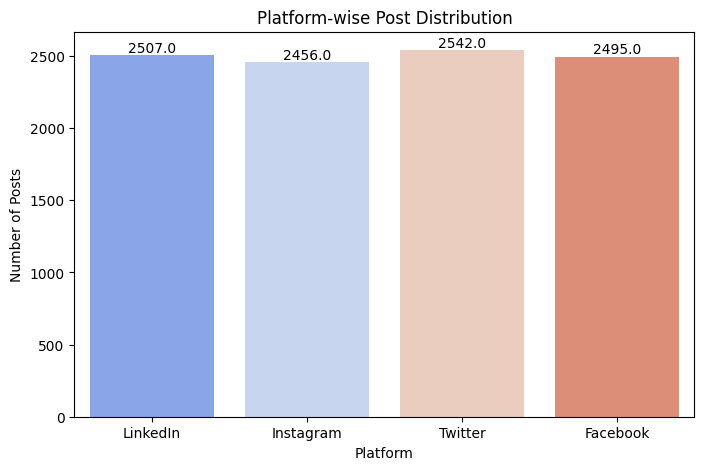

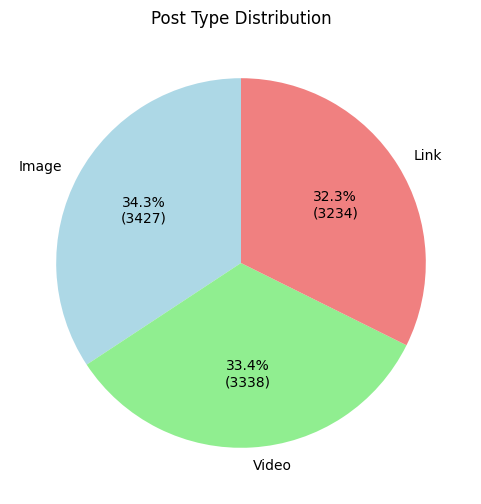

Min Likes: 33172
Max Likes: 161750
Average Likes: 135587.00


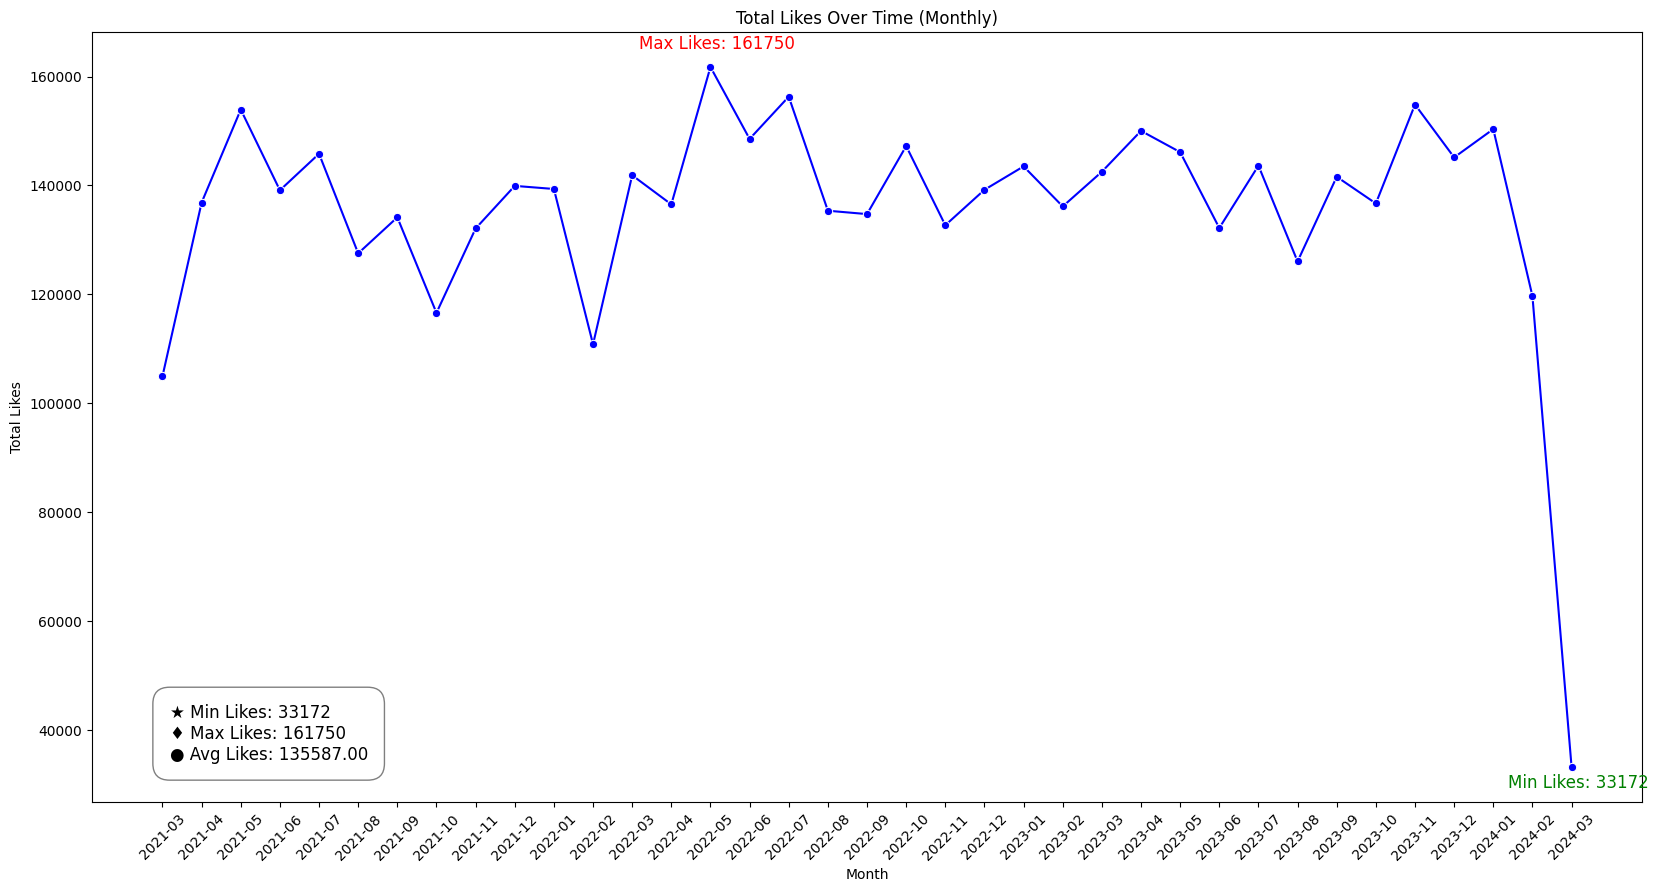

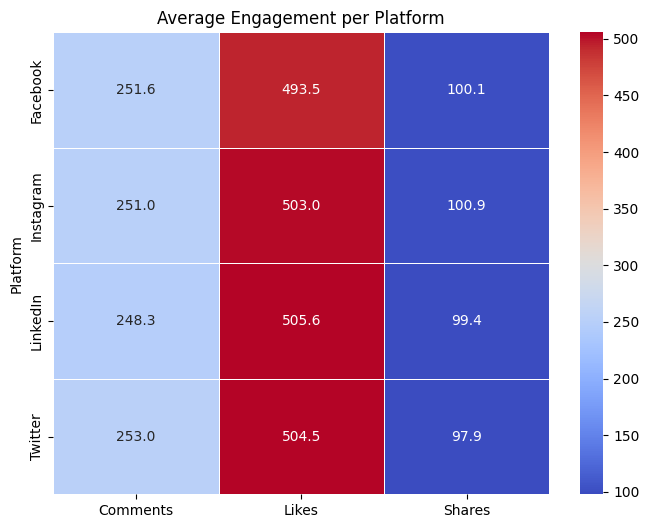

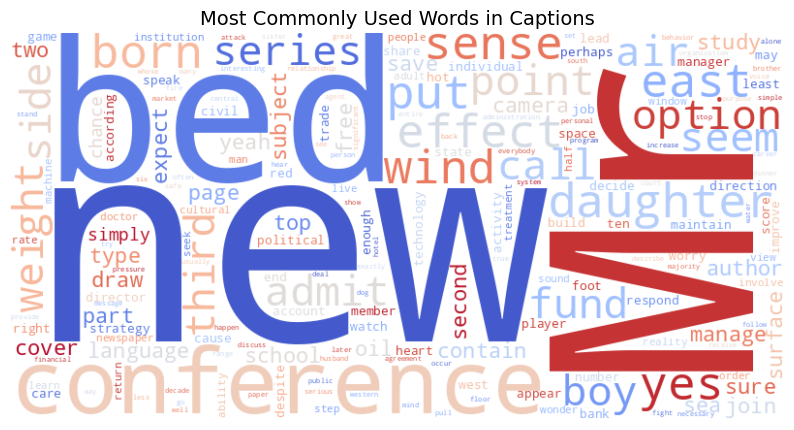

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load dataset from Excel (limit to 10,000 records)
file_path = "/content/social_media_engagement_data.xlsx"  # Change this to your actual file path
df = pd.read_excel(file_path).head(10000)

# Ensure "Post Timestamp" is treated as datetime
df["Post Timestamp"] = pd.to_datetime(df["Post Timestamp"], errors="coerce")

# Drop rows where timestamp parsing failed
df = df.dropna(subset=["Post Timestamp"])

# Convert timestamps to monthly intervals
df["Month"] = df["Post Timestamp"].dt.to_period("M").astype(str)

# 1. Platform-wise post distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Platform", data=df, palette="coolwarm")
plt.title("Platform-wise Post Distribution")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")

# Annotate with numeric values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

# 2. Post Type Popularity
plt.figure(figsize=(6, 6))
post_type_counts = df["Post Type"].value_counts()
post_type_counts.plot.pie(autopct=lambda p: f'{p:.1f}%\n({int(p*post_type_counts.sum()/100)})',
                          colors=["lightblue", "lightgreen", "lightcoral"], startangle=90)
plt.title("Post Type Distribution")
plt.ylabel("")
plt.show()

# 3. Likes Over Time (Monthly)
monthly_likes = df.groupby("Month")["Likes"].sum().reset_index()

# Store Likes values for min, max, and average calculations
likes_values = monthly_likes["Likes"].tolist()

# Calculate min, max, and average
min_value = min(likes_values)
max_value = max(likes_values)
average_value = sum(likes_values) / len(likes_values)

# Print min, max, and average values
print(f"Min Likes: {min_value}")
print(f"Max Likes: {max_value}")
print(f"Average Likes: {average_value:.2f}")

# Define random symbols for the legend box
symbols = ['★', '♦', '●']  # Stars, diamonds, and circles as random symbols

# Plot Likes Over Time
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x="Month", y="Likes", data=monthly_likes, marker="o", color="blue")
plt.title("Total Likes Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Total Likes")
plt.xticks(rotation=45)


# Highlight min and max values on the graph (without arrows)
min_row = monthly_likes[monthly_likes["Likes"] == min_value].iloc[0]
max_row = monthly_likes[monthly_likes["Likes"] == max_value].iloc[0]

# Adjust annotation positions to be closer to the points
ax.annotate(f'Min Likes: {min_value}',
            (min_row["Month"], min_row["Likes"]),
            xytext=(5, -18), textcoords="offset points",
            ha='center', va='bottom', fontsize=12, color='green')

ax.annotate(f'Max Likes: {max_value}',
            (max_row["Month"], max_row["Likes"]),
            xytext=(5, 10), textcoords="offset points",
            ha='center', va='bottom', fontsize=12, color='red')

# Add a text box with min, max, and average values
textstr = f'{symbols[0]} Min Likes: {min_value}\n' \
          f'{symbols[1]} Max Likes: {max_value}\n' \
          f'{symbols[2]} Avg Likes: {average_value:.2f}'

# Create a box for the text
props = dict(boxstyle="round,pad=1", facecolor="white", alpha=0.5)

# Add the box with the text inside it in the lower-left corner
plt.gca().text(0.05, 0.05, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='bottom', horizontalalignment='left', bbox=props)

plt.show()

# 4. Heatmap: Platform-wise Post Engagement (Only Averages)
plt.figure(figsize=(8, 6))
heatmap_data = df.pivot_table(index="Platform", values=["Likes", "Comments", "Shares"], aggfunc="mean")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Average Engagement per Platform")
plt.show()

from wordcloud import WordCloud
import numpy as np

# 5. Word Cloud: Most Used Words in Captions
plt.figure(figsize=(10, 6))

# Check if 'Caption' or 'Post Content' exists in the dataset
caption_column = "Caption" if "Caption" in df.columns else "Post Content" if "Post Content" in df.columns else None

if caption_column:
    text = " ".join(str(caption) for caption in df[caption_column].dropna())

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text)

    # Display the word cloud
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.title("Most Commonly Used Words in Captions", fontsize=14)
    plt.show()
else:
    print("No suitable text column found for word cloud.")
